The Street View House Numbers (SVHN) Dataset  
  
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.     

  Overview    The images come in two formats as shown below.    Format 1 : Original images with character level bounding boxes.  
  
  <XXXXXXXXX>
Format 2 : MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).  
<XXXXXXXXXXXX>
  
  The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.     Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images  (42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).    


In [0]:
a = []
while(1):
    a.append('1')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/AIML/SVHN/'  #change dir to your project folder

In [3]:
ls

gdrive/  sample_data/


In [4]:
import os
import time
from __future__ import absolute_import
from __future__ import print_function
from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

Using TensorFlow backend.


In [0]:
TENSORBOARD_SUMMARIES_DIR = '/tmp/svhn_classifier_logs'

<h3>Load SVHN dataset from a h5 file</h3>

In [0]:
# Open the file as read only
hdf = h5py.File('/content/gdrive/My Drive/AIML/SVHN/SVHN_single_grey1.h5', 'r')

# Load the training and test set

X_train=hdf['X_train'][:]
y_train=hdf['y_train'][:]
X_test=hdf['X_test'][:]
y_test=hdf['y_test'][:]

# Close this file
hdf.close()


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [8]:
print(X_train.dtype)

float32


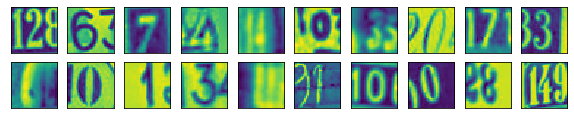

In [9]:
#Visualize Dataset - Sample House Numbers from training dataset
fig = plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])

Resize train and test dataset ( from 32X32 to 1024)

In [0]:
# Convert the (32*32) vector into one  dimensional vector of 1 * 1024
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [0]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 1024)
(42000,)
(18000, 1024)
(18000,)


##KNN CLASSIFIER

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.metrics import classification_report


In [0]:
#Optimum K =  sqrt(N)/2 where N is the number of samples.
#Here we have 42000 samples and hence K = sqrt(42000)/2 = 103
k = [103]
knn = KNeighborsClassifier(weights = 'uniform', metric='euclidean', n_jobs = -1)
parameters = {'n_neighbors' : k}
GS = GridSearchCV(knn, parameters, scoring = 'accuracy', cv=3)

In [15]:
GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [103]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [16]:
GS.cv_results_

{'mean_fit_time': array([3.25187389]),
 'mean_score_time': array([54.05851992]),
 'mean_test_score': array([0.50166667]),
 'param_n_neighbors': masked_array(data=[103],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 103}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.51081911]),
 'split1_test_score': array([0.49485714]),
 'split2_test_score': array([0.49932128]),
 'std_fit_time': array([0.01702992]),
 'std_score_time': array([0.51118117]),
 'std_test_score': array([0.00672444])}

In [17]:
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

In [18]:
model=GS.best_estimator_
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

In [0]:
y_pred=model.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.5407222222222222

In [29]:
print("Accuracy score %5.2f " %(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("F1 score is %5.2f" %(f1_score(y_true=y_test, y_pred=y_pred, average='weighted')))
print("Classification report")
print(classification_report(y_test, y_pred))
print("Confusion matrix ")
print(confusion_matrix(y_test, y_pred))

Accuracy score  0.54 
F1 score is  0.54
Classification report
              precision    recall  f1-score   support

           0       0.43      0.72      0.54      1814
           1       0.45      0.74      0.56      1828
           2       0.67      0.52      0.59      1803
           3       0.51      0.43      0.47      1719
           4       0.65      0.65      0.65      1812
           5       0.56      0.42      0.48      1768
           6       0.54      0.41      0.47      1832
           7       0.69      0.62      0.65      1808
           8       0.52      0.40      0.45      1812
           9       0.54      0.47      0.50      1804

    accuracy                           0.54     18000
   macro avg       0.56      0.54      0.54     18000
weighted avg       0.56      0.54      0.54     18000

Confusion matrix 
[[1313   82   22   38   48   29   85   36   56  105]
 [ 117 1351   52   64   66   28   41   56   28   25]
 [ 102  232  938   65   64   45   30  160   60  107]
 [

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1313,   82,   22,   38,   48,   29,   85,   36,   56,  105],
       [ 117, 1351,   52,   64,   66,   28,   41,   56,   28,   25],
       [ 102,  232,  938,   65,   64,   45,   30,  160,   60,  107],
       [ 128,  290,   85,  746,   45,  146,   38,   77,   95,   69],
       [ 126,  245,   40,   53, 1184,   19,   54,   15,   27,   49],
       [ 185,  164,   42,  208,   57,  743,  126,   41,  108,   94],
       [ 365,  149,   28,   56,  152,   83,  758,   23,  157,   61],
       [ 121,  189,   96,   68,   34,   31,   47, 1130,   32,   60],
       [ 273,  136,   49,   89,  102,   95,  180,   22,  721,  145],
       [ 300,  164,   38,   64,   66,   98,   48,   85,   92,  849]])

## Model Build-Neural Network 
### RELU Activation with 2 hidden layers and Batch Normalization

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout, Flatten
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from keras.layers import Conv2D, MaxPooling2D

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [33]:

model_batch = Sequential()
model_batch.add(Dense(128, activation='relu',input_shape=(1024,),kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu',kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(10, activation='softmax'))
model_batch.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 140,874
Trainable params: 140,490
Non-trainable params: 384
_________________________________________________________________


In [34]:

model_batch.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history12 = model_batch.fit(X_train, y_train, 
                           batch_size=128,
                           epochs=50, verbose=1, 
                           validation_data=(X_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/50





42000/42000 [==============================] - 4s 95us/step - loss: 2.0319 - acc: 0.3075 - val_loss: 1.6864 - val_acc: 0.4404
Epoch 2/50
42000/42000 [==============================] - 2s 58us/step - loss: 1.4808 - acc: 0.5327 - val_loss: 1.3666 - val_acc: 0.5733
Epoch 3/50
42000/42000 [==============================] - 2s 58us/step - loss: 1.2421 - acc: 0.6225 - val_loss: 1.1938 - val_acc: 0.6335
Epoch 4/50
42000/42000 [==============================] - 2s 55us/step - loss: 1.0973 - acc: 0.6685 - val_loss: 1.0875 - val_acc: 0.6692
Epoch 5/50
42000/42000 [==============================] - 2s 54us/step - loss: 1.0023 - acc: 0.6967 - val_loss: 1.3234 - val_acc: 0.6011
Epoch 6/50
42000/42000 [==============================] - 2s 55us/step - loss: 0.9320 - acc: 0.7182 - val_loss: 0.9921 - val_acc: 0.6933
Epoch 7/50
42000/42000 [

In [35]:

max(history12.history["val_acc"])

0.8230555554495917

In [36]:

# Initializing prettytable
from prettytable import PrettyTable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",[1,2])
Model_Performance.add_column("MODEL_NAME",["KNN","Neural Net Model"])
Model_Performance.add_column("TESTING ACCURACY",[54.7,82.3])

# Printing the Model_Performance
print(Model_Performance)

+--------+------------------+------------------+
| INDEX. |    MODEL_NAME    | TESTING ACCURACY |
+--------+------------------+------------------+
|   1    |       KNN        |       54.7       |
|   2    | Neural Net Model |       82.3       |
+--------+------------------+------------------+
